In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ai_job_dataset.csv')

In [3]:
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

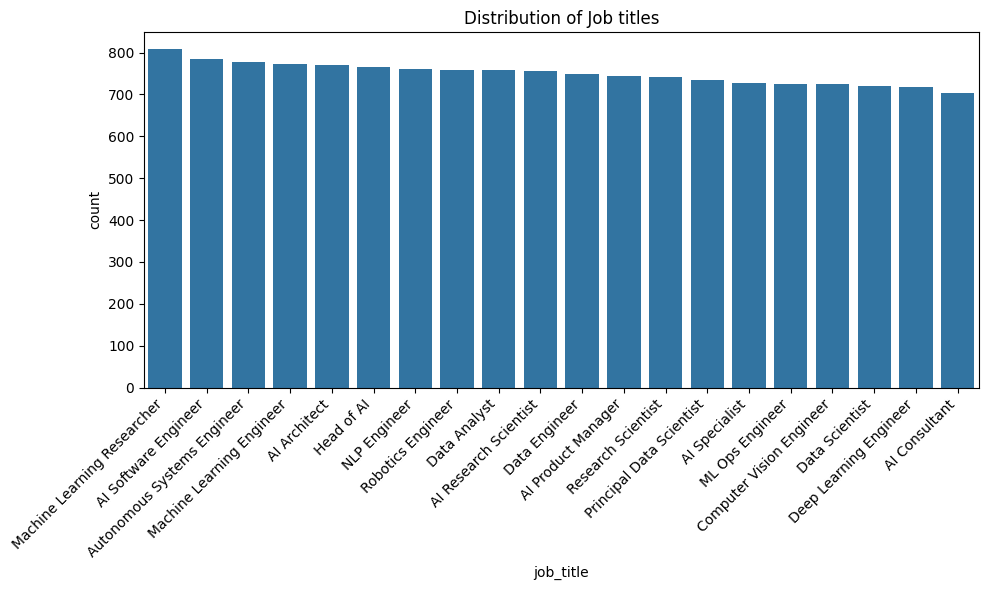

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job_title', order=df['job_title'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Job titles')
plt.tight_layout()
plt.show()

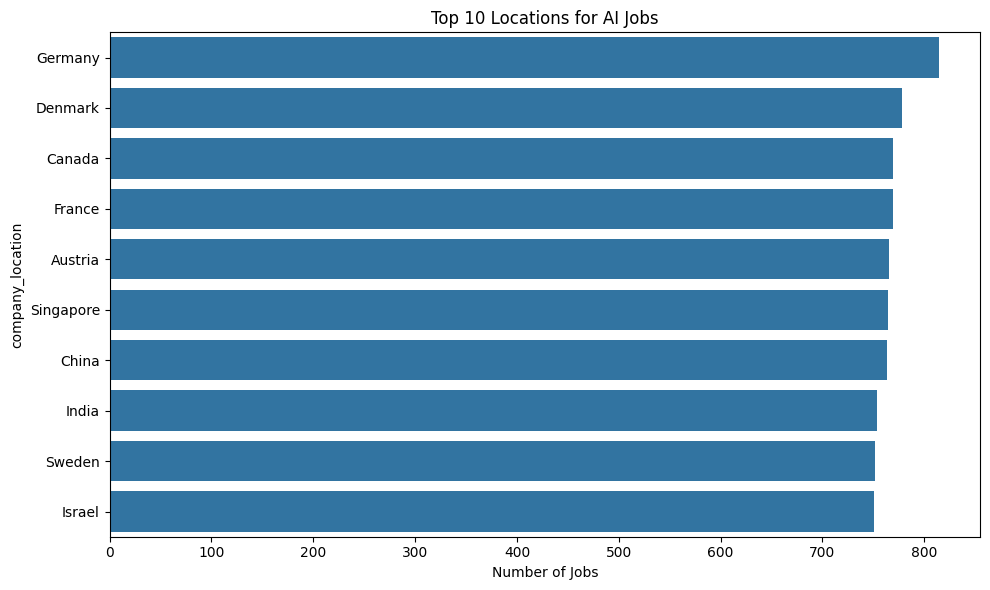

In [16]:
top_cities = df['company_location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Locations for AI Jobs')
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()

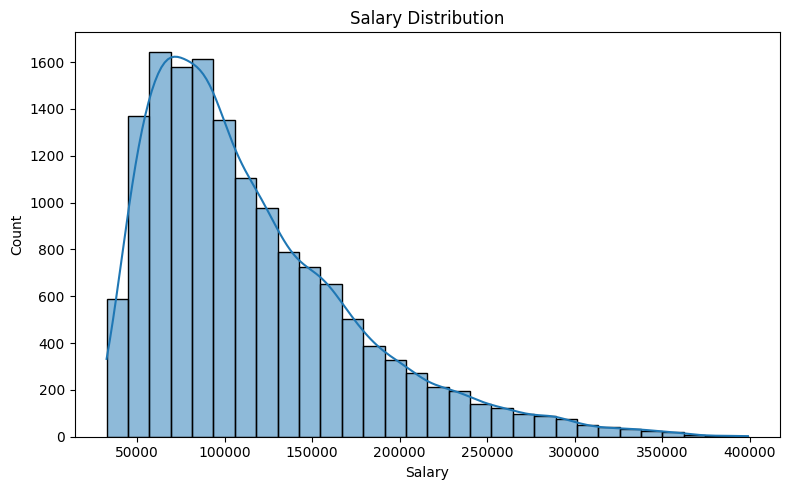

In [14]:

plt.figure(figsize=(8, 5))
sns.histplot(df['salary_usd'].dropna(), bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

In [11]:
from wordcloud import WordCloud


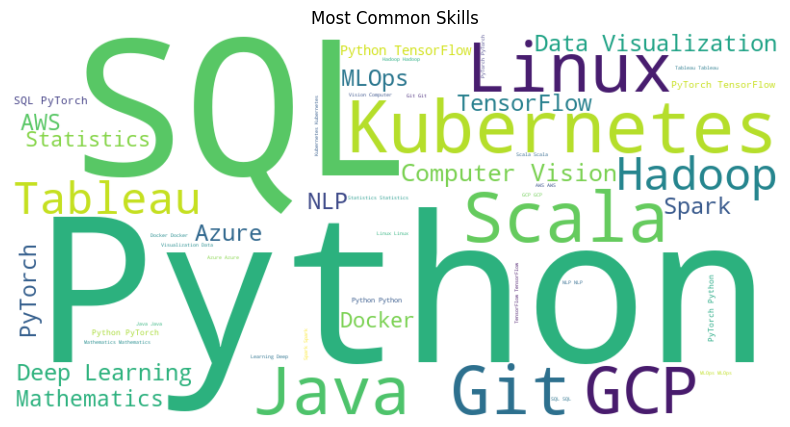

In [18]:
text = ' '.join(df['required_skills'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Skills')
plt.show()

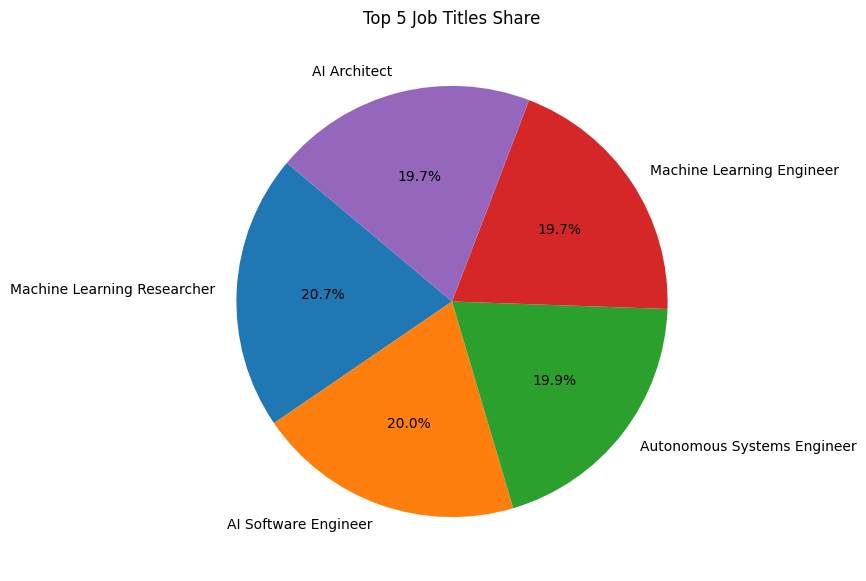

In [20]:
job_counts = df['job_title'].value_counts().head(5)
plt.figure(figsize=(7, 7))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Job Titles Share')
plt.show()

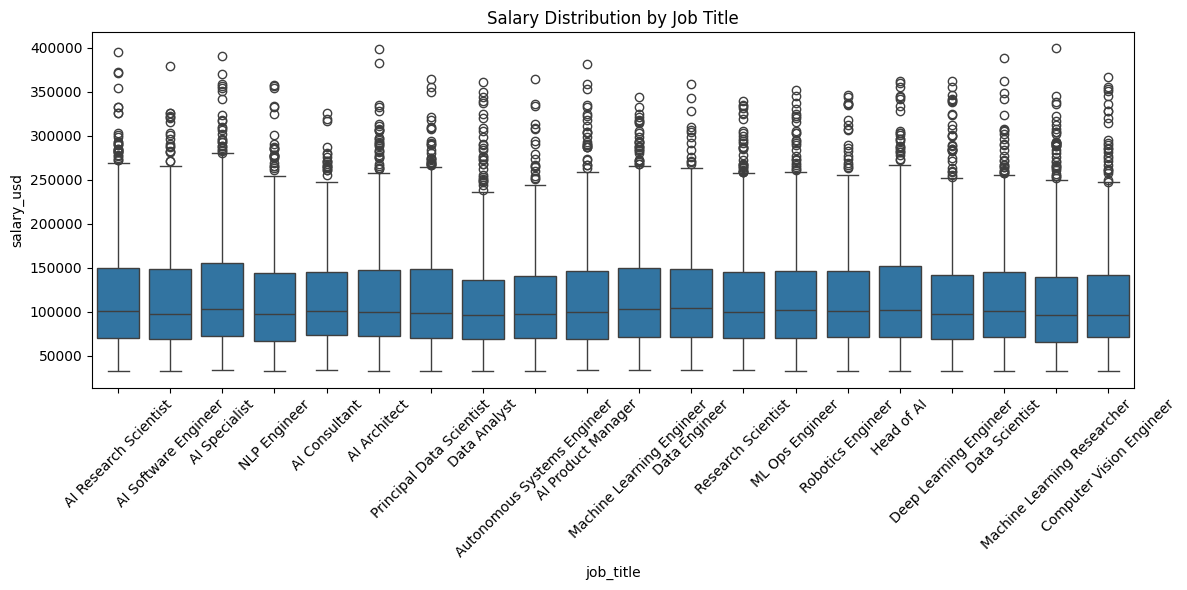

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job_title', y='salary_usd')
plt.title('Salary Distribution by Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

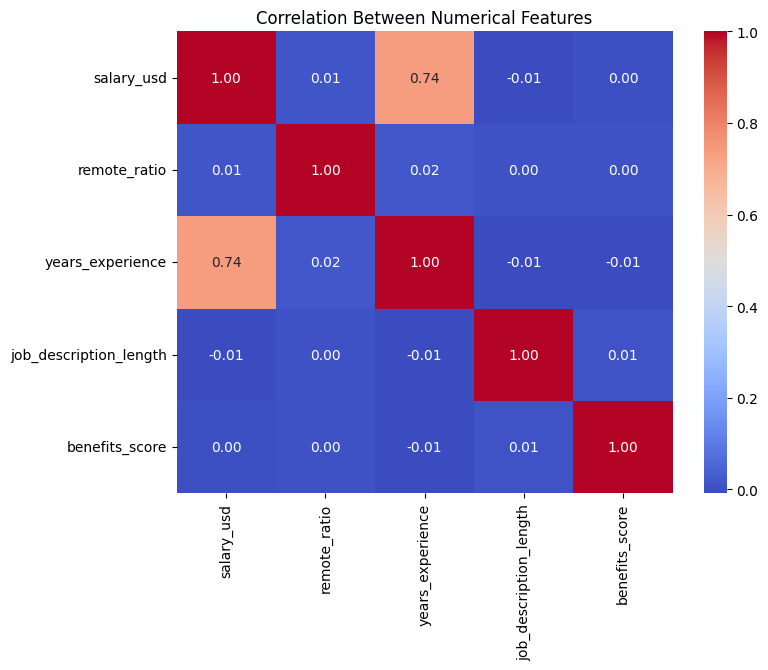

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Features')
plt.show()

In [29]:
import plotly.express as px

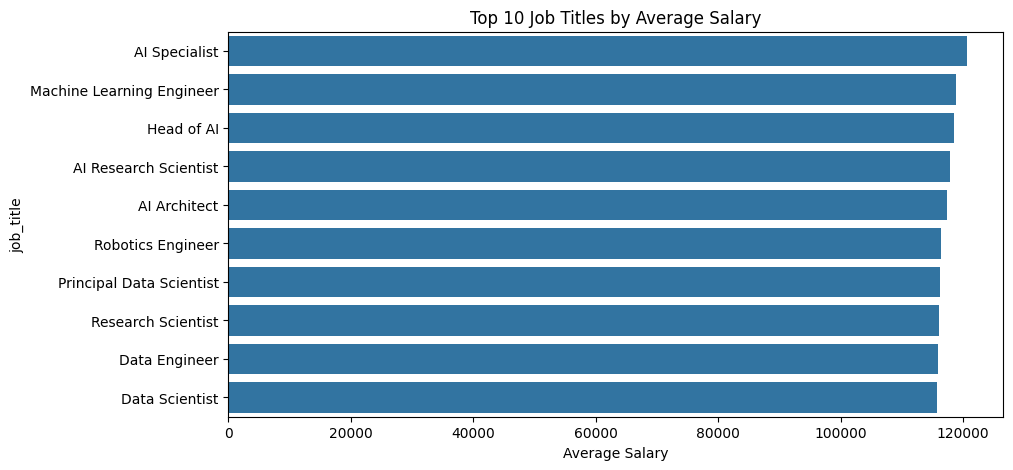

In [37]:
avg_salary = df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_salary.values, y=avg_salary.index)
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary')
plt.show()

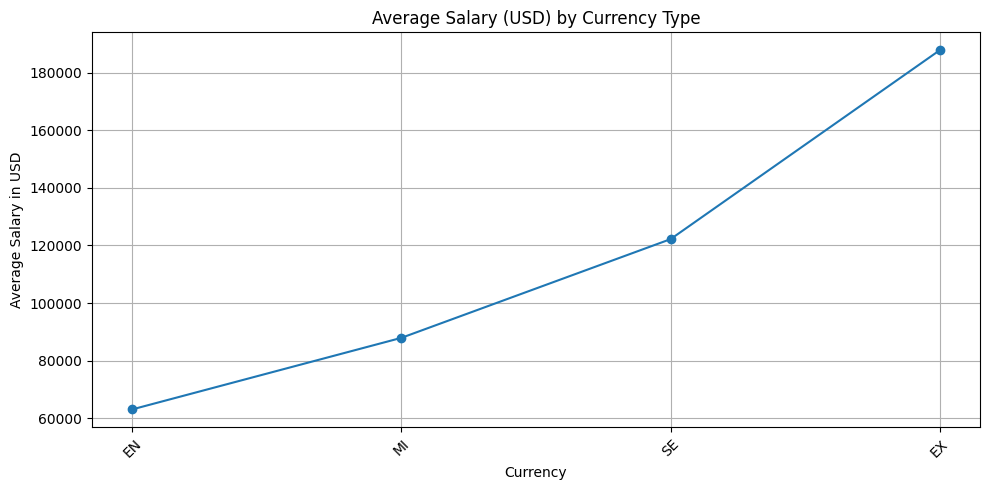

In [47]:
avg_salary = df.groupby('experience_level')['salary_usd'].mean().sort_values()

plt.figure(figsize=(10, 5))
plt.plot(avg_salary.index, avg_salary.values, marker='o', linestyle='-')
plt.title('Average Salary (USD) by Currency Type')
plt.xlabel('Currency')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
industry_jobcount = df.pivot_table(index = 'industry',values = 'job_id',aggfunc = 'count')
industry_jobcount

,job_id
industry,
Automotive,1020
Consulting,1020
Education,956
Energy,976
Finance,984
Gaming,967
Government,998
Healthcare,997
Manufacturing,962


In [52]:
employment_type = df.pivot_table(index = ['employment_type'],values = ['job_id'],aggfunc = 'count')
employment_type

,job_id
employment_type,
CT,3721
FL,3758
FT,3812
PT,3709


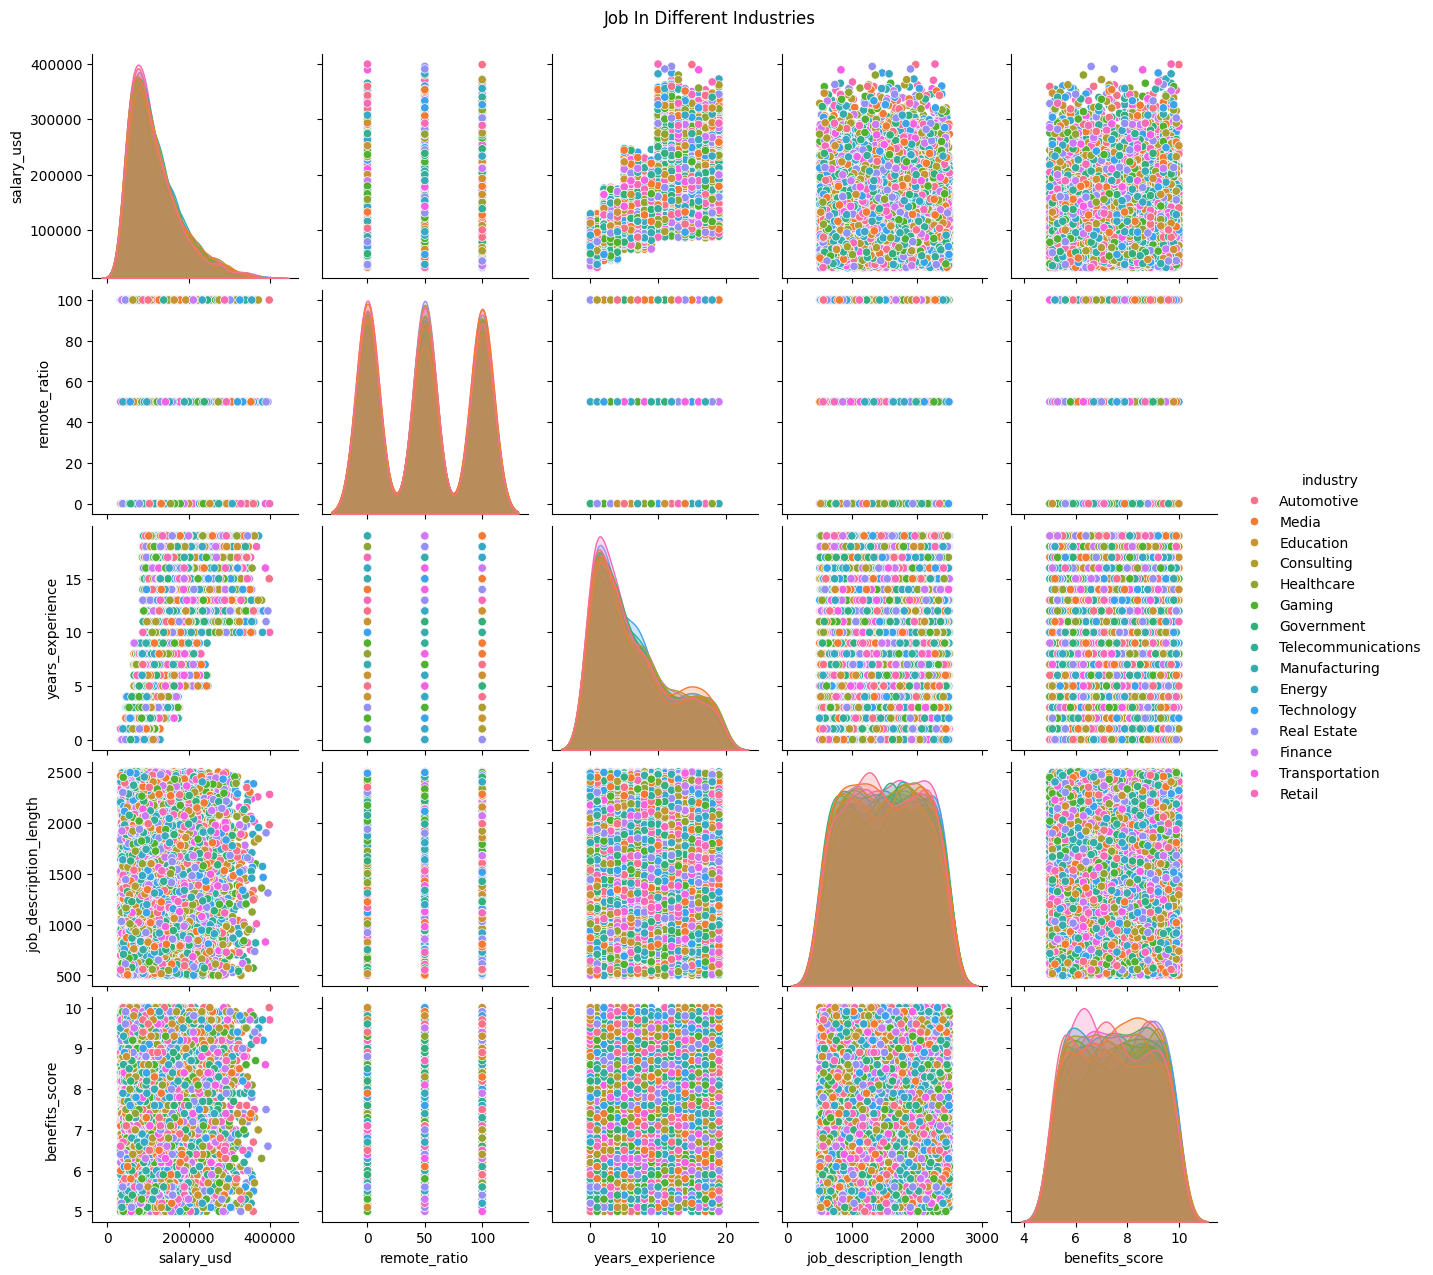

In [53]:
sns.pairplot(df, hue="industry", diag_kind='kde', palette="husl")
plt.suptitle("Job In Different Industries", y=1.02)
plt.show()